In [26]:
import pandas as pd
import numpy as np
import json
import itertools
import spotipy
from spotipy.oauth2 import SpotifyOAuth

# Authentication with Spotify

In [2]:
# Authorization Code Flow
# I need the user-top-read authentication to get my users top tracks 
SCOPE = 'user-top-read'
CLIENT_ID = "03047be420ab4ef482e5312d78a720f0"
CLIENT_SECRET = "404f1e8783794d56b2c7fa475c20933e"
REDIRECT_URI = "http://localhost:3000"

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(scope=SCOPE, client_id=CLIENT_ID, client_secret=CLIENT_SECRET, redirect_uri=REDIRECT_URI))

# API call

In [3]:
# Get my top tracks
# we do all the ranges ("long_term" "medium_term", "short_term") to get most of the tracks since we can only get 50 tracks at a time.
# I also exploit a bug where offsetting 49 can get you 49 more tracks, per range!
# I also assume they arrive in the correct chronological order, so most popular on top and least popular on bottom.

tt_long_first = sp.current_user_top_tracks(limit=50, offset=0, time_range='long_term')
tt_long_second = sp.current_user_top_tracks(limit=50, offset=49, time_range='long_term')

tt_medium_first = sp.current_user_top_tracks(limit=50, offset=0, time_range='medium_term')
tt_medium_second = sp.current_user_top_tracks(limit=50, offset=49, time_range='medium_term')

tt_short_first = sp.current_user_top_tracks(limit=50, offset=0, time_range='short_term')
tt_short_second = sp.current_user_top_tracks(limit=50, offset=49, time_range='short_term')

In [4]:
#check that all responses have 50 items in them
print(len(tt_long_first["items"]))
print(len(tt_long_second["items"]))
print(len(tt_medium_first["items"]))
print(len(tt_medium_second["items"]))
print(len(tt_short_first["items"]))
print(len(tt_short_second["items"]))

50
50
50
50
50
50


# Make dataframes

In [33]:
# combine ranges and go through all long_term tracks, filter and track name, id and range to dataframe 

tt_longs = [tt_long_first, tt_long_second]
df_long_comb = pd.DataFrame()

for tt_long in tt_longs:  
    # add to dataframe
    df_long = pd.DataFrame(tt_long["items"])
    
    # filter away everything exept track name and track id
    df_long_filtered = df_long.filter(["id", "name"])
    
    # add coulumn with the range
    df_long_filtered["range"] = "long_term"
    
    # add to final df
    df_long_comb = pd.concat([df_long_comb, df_long_filtered], ignore_index=True)
  
# print stuff
df_long_comb

,id,name,range
0,2E638Wy85ULliAXTQEFET0,The Border,long_term
1,6ZHaA7gE78xjsJ9MZCBw8x,Awake,long_term
2,6kWzCCAghrDeVFZSKgYVGL,"Mass in B Minor, BWV 232: Kyrie: Kyrie eleison...",long_term
3,0uoHVRsDwVHtzYLMvRkxtC,Automatic,long_term
4,2Ghp894n1laIf2w98VeAOJ,How Do I Make You Love Me?,long_term
...,...,...,...
95,4hRdaL1ZSGvPJNQezb0ejL,Wuthering Heights - 2018 Remaster,long_term
96,5ozqshq2dtU7SYCpCBu0NE,One More Year,long_term
97,4mExZER1NmVLhNy9aPmdUS,Time To Dance - Sebastian Remix,long_term
98,2OqtZbITDWCFUHAT9fmdin,Choses nouvelles,long_term


In [34]:
# go through all medium_term tracks, filter and track name, id and range to dataframe

df_medium_comb = pd.DataFrame()
tt_mediums = [tt_medium_first, tt_medium_second]

for tt_medium in tt_mediums:  
    # add to dataframe
    df_medium = pd.DataFrame(tt_medium["items"])
    
    # filter away everything exept track name and track id
    df_medium_filtered = df_medium.filter(["id", "name"])
    
    # add coulumn with the range
    df_medium_filtered["range"] = "medium_term"
    
    # add to final df
    df_medium_comb = pd.concat([df_medium_comb, df_medium_filtered], ignore_index=True)

# print
df_medium_comb

,id,name,range
0,6X5zsgjDlssIkv0sVYZgx1,Tattoo,medium_term
1,7j43FohbLVulScL7S9sQZk,Ausländer,medium_term
2,1a8JpAL3vbAdXYrEABvOtb,Amerika,medium_term
3,6mcfZIZhkEmNkh2ezmecvb,Desire,medium_term
4,2bPGTMB5sFfFYQ2YvSmup0,Deutschland,medium_term
...,...,...,...
95,3d3k8g4GTVx9EFIFlOZOEX,Zeig dich,medium_term
96,3lApcJC16V67JIJE7CCfth,Too Many People - 2012 Remaster,medium_term
97,3obrfotpr4kLCKiOu2GZ4Q,My Little Town,medium_term
98,3s6QcBTY9vS3A3WdzCnouR,Bridge over Troubled Water,medium_term


In [35]:
# go through all short_term tracks, filter and track name, id and range to dataframe

df_short_comb = pd.DataFrame()
tt_shorts = [tt_short_first, tt_short_second]

for tt_short in tt_shorts:  
    # add to dataframe
    df_short = pd.DataFrame(tt_short["items"])
    
    # filter away everything exept track name and track id
    df_short_filtered = df_short.filter(["id", "name"])
    
    # add coulumn with the range
    df_short_filtered["range"] = "short_term"
    
    # add to final df
    df_short_comb = pd.concat([df_short_comb, df_short_filtered], ignore_index=True)
    
# print
df_short_comb

,id,name,range
0,2Rr22UFL2JTTTflT2iD14Z,Edo,short_term
1,4PHoUATsLrJp0wCmokcqF2,Another Side (feat. We Are KING),short_term
2,4M79cLY4GkP14mwuytdzHj,Dern Kala - Live at RBC Echo Beach,short_term
3,5P54gaORO9yFiQ6PO28v6T,Düsseldorf,short_term
4,1a8JpAL3vbAdXYrEABvOtb,Amerika,short_term
...,...,...,...
95,1xkYnVp4lmP9r1W1DVd6Pd,Infinite End,short_term
96,1zPRp8SGQu5nATv2Telw2D,Sex Music,short_term
97,2CcYI8KxDgOiOaM7axIP3h,Fadjamou,short_term
98,2EFuKYBalAcplMyUVL3BDH,Maria También,short_term


# Add preferance rating to tracks

In [52]:
# add preferance ratings values to each track in the dataframes. 
# I interprate tracks at the top of the dataframe are more popular than bottom track.
# I interpolate between

# For long_term, I spread from 10 to 0.
# for medium_term, I spread from 8 to 2.
# for short_term, I spread from 6 to 4. 

# long term
# add rating column with NaNs
df_long_comb["rating"] = np.nan

# add 10 at the top and 0 at the very bottom of the rating column
df_long_comb.loc[df_long_comb.index[0], 'rating'] = 10
df_long_comb.loc[df_long_comb.index[-1], 'rating'] = 0

# linear interpolate from 10 to 0 through all tracks. 
df_long_comb["rating"] = df_long_comb["rating"].interpolate(method='linear')

#print to see.
df_long_comb

,id,name,range,rating
0,2E638Wy85ULliAXTQEFET0,The Border,long_term,10.00000
1,6ZHaA7gE78xjsJ9MZCBw8x,Awake,long_term,9.89899
2,6kWzCCAghrDeVFZSKgYVGL,"Mass in B Minor, BWV 232: Kyrie: Kyrie eleison...",long_term,9.79798
3,0uoHVRsDwVHtzYLMvRkxtC,Automatic,long_term,9.69697
4,2Ghp894n1laIf2w98VeAOJ,How Do I Make You Love Me?,long_term,9.59596
...,...,...,...,...
95,4hRdaL1ZSGvPJNQezb0ejL,Wuthering Heights - 2018 Remaster,long_term,0.40404
96,5ozqshq2dtU7SYCpCBu0NE,One More Year,long_term,0.30303
97,4mExZER1NmVLhNy9aPmdUS,Time To Dance - Sebastian Remix,long_term,0.20202
98,2OqtZbITDWCFUHAT9fmdin,Choses nouvelles,long_term,0.10101


In [53]:
# medium term
# for medium_term, I spread from 8 to 2.

# add rating column with NaNs
df_medium_comb["rating"] = np.nan

# add 10 at the top and 0 at the very bottom of the rating column
df_medium_comb.loc[df_medium_comb.index[0], 'rating'] = 8
df_medium_comb.loc[df_medium_comb.index[-1], 'rating'] = 2

# linear interpolate from 10 to 0 through all tracks. 
df_medium_comb["rating"] = df_medium_comb["rating"].interpolate(method='linear')

#print to see.
df_medium_comb

,id,name,range,rating
0,6X5zsgjDlssIkv0sVYZgx1,Tattoo,medium_term,8.000000
1,7j43FohbLVulScL7S9sQZk,Ausländer,medium_term,7.939394
2,1a8JpAL3vbAdXYrEABvOtb,Amerika,medium_term,7.878788
3,6mcfZIZhkEmNkh2ezmecvb,Desire,medium_term,7.818182
4,2bPGTMB5sFfFYQ2YvSmup0,Deutschland,medium_term,7.757576
...,...,...,...,...
95,3d3k8g4GTVx9EFIFlOZOEX,Zeig dich,medium_term,2.242424
96,3lApcJC16V67JIJE7CCfth,Too Many People - 2012 Remaster,medium_term,2.181818
97,3obrfotpr4kLCKiOu2GZ4Q,My Little Town,medium_term,2.121212
98,3s6QcBTY9vS3A3WdzCnouR,Bridge over Troubled Water,medium_term,2.060606


In [54]:
# short term
# for short_term, I spread from 6 to 4.

# add rating column with NaNs
df_short_comb["rating"] = np.nan

# add 10 at the top and 0 at the very bottom of the rating column
df_short_comb.loc[df_short_comb.index[0], 'rating'] = 6
df_short_comb.loc[df_short_comb.index[-1], 'rating'] = 4

# linear interpolate from 10 to 0 through all tracks. 
df_short_comb["rating"] = df_short_comb["rating"].interpolate(method='linear')

#print to see.
df_short_comb

,id,name,range,rating
0,2Rr22UFL2JTTTflT2iD14Z,Edo,short_term,6.000000
1,4PHoUATsLrJp0wCmokcqF2,Another Side (feat. We Are KING),short_term,5.979798
2,4M79cLY4GkP14mwuytdzHj,Dern Kala - Live at RBC Echo Beach,short_term,5.959596
3,5P54gaORO9yFiQ6PO28v6T,Düsseldorf,short_term,5.939394
4,1a8JpAL3vbAdXYrEABvOtb,Amerika,short_term,5.919192
...,...,...,...,...
95,1xkYnVp4lmP9r1W1DVd6Pd,Infinite End,short_term,4.080808
96,1zPRp8SGQu5nATv2Telw2D,Sex Music,short_term,4.060606
97,2CcYI8KxDgOiOaM7axIP3h,Fadjamou,short_term,4.040404
98,2EFuKYBalAcplMyUVL3BDH,Maria También,short_term,4.020202


# Combine dataframes and remove duplicates

In [55]:
# combine all
df_toptracks = pd.concat([df_short_comb, df_medium_comb, df_long_comb], ignore_index=True)
df_toptracks

,id,name,range,rating
0,2Rr22UFL2JTTTflT2iD14Z,Edo,short_term,6.000000
1,4PHoUATsLrJp0wCmokcqF2,Another Side (feat. We Are KING),short_term,5.979798
2,4M79cLY4GkP14mwuytdzHj,Dern Kala - Live at RBC Echo Beach,short_term,5.959596
3,5P54gaORO9yFiQ6PO28v6T,Düsseldorf,short_term,5.939394
4,1a8JpAL3vbAdXYrEABvOtb,Amerika,short_term,5.919192
...,...,...,...,...
295,4hRdaL1ZSGvPJNQezb0ejL,Wuthering Heights - 2018 Remaster,long_term,0.404040
296,5ozqshq2dtU7SYCpCBu0NE,One More Year,long_term,0.303030
297,4mExZER1NmVLhNy9aPmdUS,Time To Dance - Sebastian Remix,long_term,0.202020
298,2OqtZbITDWCFUHAT9fmdin,Choses nouvelles,long_term,0.101010


In [56]:
# remove duplicates based on track id


# Ratings distribution plot

<Axes: title={'center': 'test'}, ylabel='Frequency'>

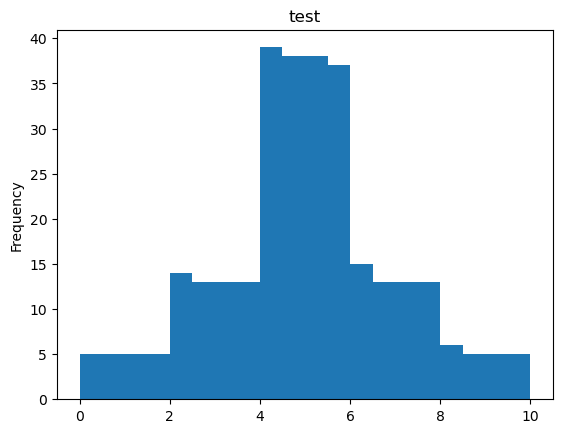

In [57]:
df_toptracks["rating"].plot(title="test", kind='hist', bins=20)

In [ ]:
# add to csv